In [2]:
import xarray as xr
path = r'2024-08-20_merged_June_results.nc'
dataset  = xr.open_dataset(path)
dataset

<xarray.Dataset> Size: 5GB
Dimensions:                       (time: 600, time_sensor: 18000,
                                   time_psd: 107, Frequency_psd: 707)
Coordinates:
  * time                          (time) datetime64[ns] 5kB 2023-12-04 ... 20...
  * time_sensor                   (time_sensor) float64 144kB 0.0 ... 3.6e+03
  * time_psd                      (time_psd) datetime64[ns] 856B 2023-12-04 ....
  * Frequency_psd                 (Frequency_psd) float64 6kB 0.0 ... 2.5
Data variables: (12/101)
    simu_cur_dir                  (time) float64 5kB ...
    simu_cur                      (time) float64 5kB ...
    simu_dp                       (time) float64 5kB ...
    simu_tp                       (time) float64 5kB ...
    simu_hs                       (time) float64 5kB ...
    simu_mag10                    (time) float64 5kB ...
    ...                            ...
    simu_V_SPM_LOAD_Pin_1_psd     (time_psd, Frequency_psd) float64 605kB ...
    simu_V_SPM_LOAD_Pin_2_psd     (time_psd, Frequency_psd) float64 605kB ...
    simu_V_SPM_LOAD_Pin_3_psd     (time_psd, Frequency_psd) float64 605kB ...
    simu_V_SPM_LOAD_Pin_4_psd     (time_psd, Frequency_psd) float64 605kB ...
    simu_V_SPM_LOAD_Pin_5_psd     (time_psd, Frequency_psd) float64 605kB ...
    simu_V_SPM_LOAD_Pin_6_psd     (time_psd, Frequency_psd) float64 605kB ...
Attributes:
    institution:      Saitec Offshore Technologies
    raw_file_suffix:  highres.xlsx
    description:      Netcdf file with environmental data as well as simulati...

Xarray library provides a lot of plotting built-in functionalities. You can follow this tutorial for advanced options (https://docs.xarray.dev/en/stable/user-guide/plotting.html#details).


See below some lines of codes for a quick start :


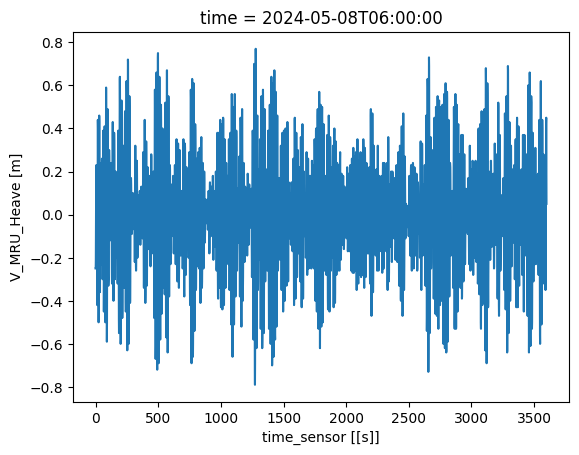

In [5]:
dataset.sel(time='2024-05-08T06:00:00')['V_MRU_Heave'].dropna(dim='time_sensor').plot()

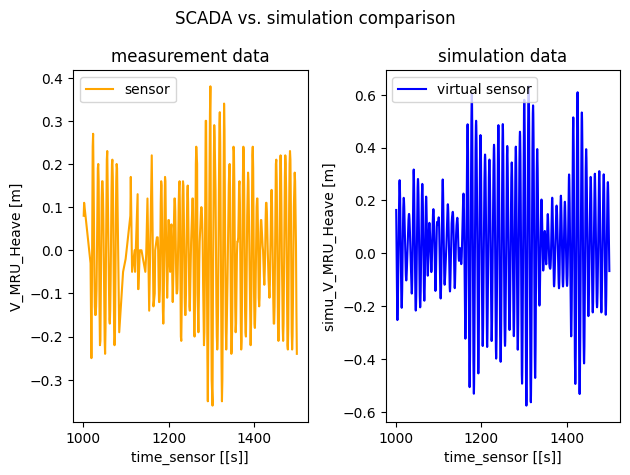

In [7]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1,2)

# Select data and dataarrays
sensor_dataarray = dataset.sel(time = "2024-05-05 02")['V_MRU_Heave'].dropna(dim='time_sensor')
simu_dataarray = dataset.sel(time = "2024-05-05 02")['simu_V_MRU_Heave'].dropna(dim='time_sensor')
t0 = 1000
t1 = 1500
sensor_dataarray.where((dataset.time_sensor > t0) & (dataset.time_sensor <t1)).plot(ax = ax[0], color='orange', label='sensor')
simu_dataarray.where((dataset.time_sensor > t0) & (dataset.time_sensor <t1)).plot(ax = ax[1], color='blue')

# customize the matplotlib plot
ax[0].legend()
ax[1].legend(['virtual sensor'])
ax[0].set_title('measurement data')
ax[1].set_title('simulation data')
plt.suptitle('SCADA vs. simulation comparison')
plt.setp( ax[0].get_xticklabels(), visible=True)
plt.setp( ax[1].get_xticklabels(), visible=True)
plt.tight_layout()


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-e

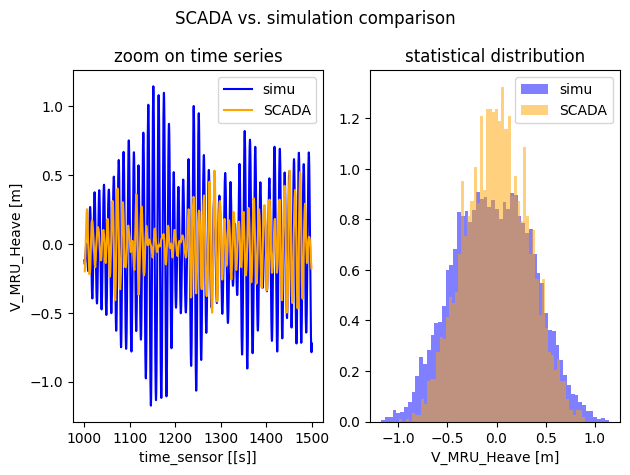

In [8]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2)

# Select data and dataarrays
sensor_dataarray = dataset.sel(time = "2024-05-08 09")['V_MRU_Heave'].dropna(dim='time_sensor')
simu_dataarray = dataset.sel(time = "2024-05-08 09")['simu_V_MRU_Heave'].dropna(dim='time_sensor')
t0 = 1000
t1 = 1500

simu_dataarray.where((dataset.time_sensor > t0) & (dataset.time_sensor <t1)).plot(ax = ax[0], color='blue', label = 'simu')
sensor_dataarray.where((dataset.time_sensor > t0) & (dataset.time_sensor <t1)).plot(ax = ax[0], color='orange', label='SCADA')

simu_dataarray.plot.hist(ax=ax[1], color='blue', bins=60, density=True, label='simu', alpha=0.5)
sensor_dataarray.plot.hist(ax=ax[1], color='orange', bins=60, density=True, label='SCADA', alpha=0.5)


# customize the matplotlib plot
ax[0].legend()
ax[1].legend()
ax[0].set_title('zoom on time series')
ax[1].set_title('statistical distribution')
plt.suptitle('SCADA vs. simulation comparison')
plt.setp( ax[0].get_xticklabels())
plt.setp( ax[1].get_xticklabels())
plt.tight_layout()


#### Environment histogram plot, that will be reused in next tutorial :

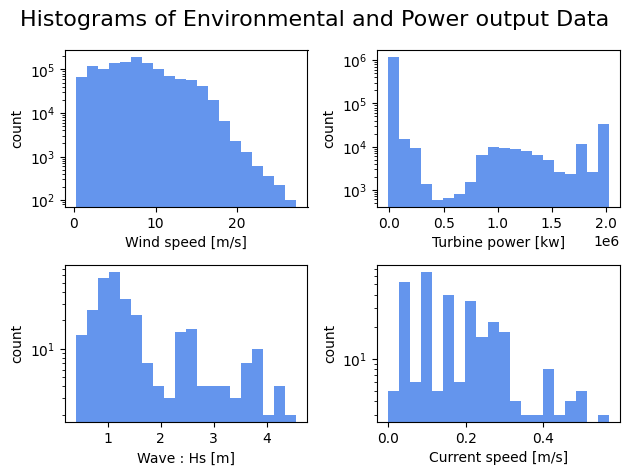

In [9]:
fig, ax = plt.subplots(2,2)
bar_color = 'cornflowerblue'
density = False

# Get mean 1 minute wind speed over the whole dataset
wind_1min = dataset['AI_WindSpeed'].dropna(dim='time_sensor', how='all').rolling(time_sensor=60).mean()
wind_1min.plot.hist(ax=ax[0,0], bins=20, color=bar_color, density=density, yscale='log')
ax[0,0].set_ylabel('count')
ax[0,0].set_xlabel('Wind speed [m/s]')

# Get mean 1 minute wind speed over the whole dataset
power_1min = dataset['V_GridRealPowerLog'].dropna(dim='time_sensor', how='all').rolling(time_sensor=60).mean()
power_1min.plot.hist(ax=ax[0,1], bins=20, color=bar_color, density=density, yscale='log')
ax[0,1].set_ylabel('count')
ax[0,1].set_xlabel('Turbine power [kw]')

# get current speed
dataset['simu_cur'].plot.hist(ax=ax[1,1], bins=20, color=bar_color, density=density, yscale='log')
ax[1,1].set_ylabel('count')
ax[1,1].set_xlabel('Current speed [m/s]')

# Get wave Hs
dataset['simu_hs'].plot.hist(ax=ax[1,0], bins=20, color=bar_color, density=density, yscale='log')
ax[1,0].set_ylabel('count')
ax[1,0].set_xlabel('Wave : Hs [m]')

# Add a general title to the figure
fig.suptitle('Histograms of Environmental and Power output Data', fontsize=16)

# Adjust layout to make room for the title
fig.tight_layout(rect=[0, 0, 1, 0.96])

fig.tight_layout()
plt.show()

You can also transform the xarray dataset to a pandas dataframe and use the matplotlib library for plotting.

In [10]:
import pandas as pd
import numpy as np

def XarrToDataFrame(xarr, cols = [], drop_non_numeric = False, fill_missing_env = False):
    utc = []
    """
    for time in Dataset['time']:
        global_time = Dataset.sel(time = time)['time'].values + pd.to_timedelta(Dataset.sel(time = time)['time_sensor'], unit = 's').round('ms').values
        utc.append(global_time)
    """
    for time in xarr['time']:
        global_time = xarr.sel(time = time)['time'].values + pd.to_timedelta(xarr.sel(time = time)['time_sensor'], unit = 's').round('ms').values
        utc.append(global_time)
    utc = np.concatenate(utc)   
    try:
        if ('hm0' in cols and cols != [] ):
            xarr['hm0'] = xarr['hm0'][:,0]
        if ('tp' in cols and cols != [] ):
            xarr['tp'] = xarr['tp'][:,0]        
        if ('CurrDir' in cols and cols != [] ): 
            xarr['CurrDir'] = xarr['CurrDir'][:,0]  
        if ('CurrSpeed' in cols and cols != [] ): 
            xarr['CurrSpeed'] = xarr['CurrSpeed'][:,0]  
        if ('AI_WindSpeed' in cols and cols != [] ): 
            xarr['AI_WindSpeed'] = xarr['AI_WindSpeed'][:,0]  
        if ('V_ST_TrueWindDir' in cols and cols != [] ): 
            xarr['V_ST_TrueWindDir'] = xarr['V_ST_TrueWindDir'][:,0]  
        if ('mdir' in cols and cols != [] ):
            xarr['mdir'] = xarr['mdir'][:,0]
    except:
        pass
    if cols != []:
        df = xarr[cols].to_dataframe().reset_index()
    else:
        df = xarr[cols].to_dataframe().reset_index()
    df.index = utc
       
    if drop_non_numeric == True:
        string_columns = df.select_dtypes(include=['object']).columns
        df = df.drop(columns=string_columns)

    if fill_missing_env == True: 
        df['simu_hs'] = df['simu_hs'].fillna(df['hm0'])
        df['simu_tp'] = df['simu_tp'].fillna(df['tp'])
        df['simu_cur'] = df['simu_cur'].fillna(df['CurrSpeed'])
        df['simu_cur_dir'] = df['simu_cur_dir'].fillna(df['CurrDir'])
        
    return(df)

In [11]:
cols = ['simu_AI_WindSpeed','simu_V_ST_TrueWindDir','simu_V_MRU_Heave','simu_V_MRU_Heading',
       'AI_WindSpeed','V_ST_TrueWindDir','V_MRU_Heave','V_MRU_Heading',
       'simu_hs', 'simu_tp', 'simu_cur_dir', 'simu_cur', 'hm0', 'tp', 'CurrDir', 'CurrSpeed',
       'simu_V_ST_TrueWindDir','V_ST_TrueWindDir','V_MRU_Pitch',
       'simu_V_GridRealPowerLog','V_GridRealPowerLog', 'airTemp']

df = XarrToDataFrame(dataset, cols,fill_missing_env = True )
df = df.resample('10min').mean()
df.CurrSpeed = df.CurrSpeed/ 100
#june_df = Dataset[cols].mean(dim = 'time_sensor').to_dataframe()
#june_df.CurrSpeed = june_df.CurrSpeed/100
df.V_GridRealPowerLog = df.V_GridRealPowerLog /1000

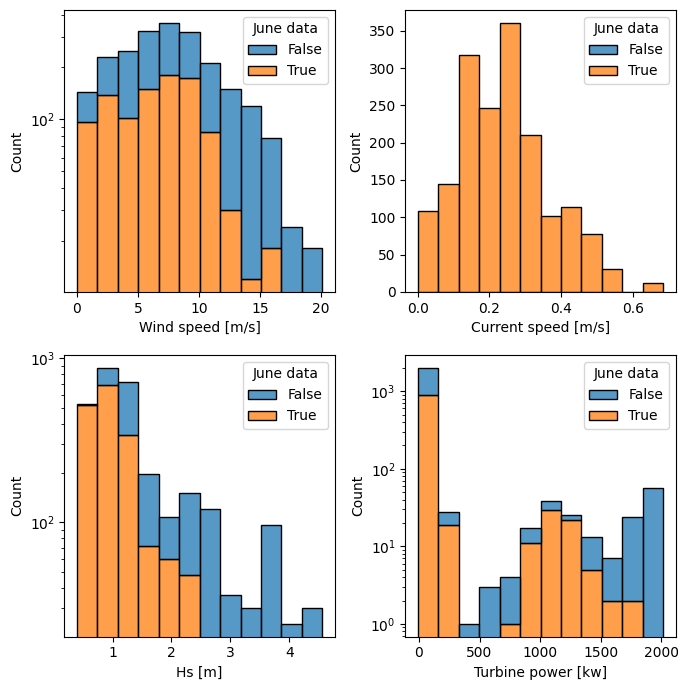

In [12]:
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize = (7,7))

df['June data'] = df.index > '2024-05-01'
#wind speed
sns.histplot(data = df, x = 'AI_WindSpeed', hue = 'June data', multiple="stack", ax = ax[0,0],bins=12)
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Wind speed [m/s]')
#current speed
sns.histplot(data = df, x = 'CurrSpeed', hue = 'June data', multiple="stack", ax = ax[0,1],bins=12)
ax[0,1].set_xlabel('Current speed [m/s]')

#Significant wave height
sns.histplot(data = df, x = 'simu_hs', hue = 'June data', multiple="stack", ax = ax[1,0],bins=12)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('Hs [m]')

#Output power
sns.histplot(data = df, x = 'V_GridRealPowerLog', hue = 'June data', multiple="stack", ax = ax[1,1],bins=12)
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Turbine power [kw]')

plt.tight_layout()
plt.show()